# Assignment 6: Pandas Groupby with Hurricane Data

Import pandas and matplotlib

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

Use the following code to download and unzip a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset.

In [3]:
! wget ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/all/csv/Allstorms.ibtracs_all.v03r10.csv.gz
! gunzip Allstorms.ibtracs_all.v03r10.csv.gz

Examine the first few lines of the file.

Then use the following code to load as a pandas dataframe. Think about the options being used and why.

In [4]:
df = pd.read_csv('Allstorms.ibtracs_all.v03r10.csv',
                 parse_dates=['ISO_time'], usecols=range(12),
                 skiprows=[0, 2], na_values=[-999, 'NOT NAMED'])
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO)
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,NaN,NaN,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,NaN,NaN,NaN,NaN
2,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,NaN,NaN,NaN,NaN
3,1842298N11080,1842,1,NI,AS,NaN,1842-10-26 00:00:00,NR,NaN,NaN,NaN,NaN
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-26 06:00:00,NR,NaN,NaN,NaN,NaN


### 1) Get the unique values of the `Basin`, `Sub_basin`, and `Nature` columns

In [47]:
basin = list(df.groupby('Basin').nunique().index)
subbasin = list(df.groupby('Sub_basin').nunique().index)
nature = list(df.groupby('Nature').nunique().index)
basin

['EP', 'NA', 'NI', 'SA', 'SI', 'SP', 'WP']

### 2) Fix these columns by eliminating the whitespace at the beginning of each

In [48]:
df.Basin = df.Basin.str.lstrip()
df.Sub_basin = df.Sub_basin.str.lstrip()
df.Nature = df.Nature.str.lstrip()

df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind,Pres
71,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-11 06:00:00,NR,-8.6,79.8,0.0,0.0
75,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-12 06:00:00,NR,-9.0,78.9,0.0,0.0
79,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-13 06:00:00,NR,-10.4,73.2,0.0,0.0
83,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-14 06:00:00,NR,-12.8,69.9,0.0,0.0
87,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-15 06:00:00,NR,-13.9,68.9,0.0,0.0


### 3) Filter the dataframe to eliminate rows with no position information

In [49]:
df = df.dropna(subset=['Latitude', 'Longitude'])   

### 4) Rename columns to get rid of parenthesis

In [10]:
df = df.rename(columns={"Wind(WMO)": "Wind", "Pres(WMO)": "Pres"})
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind,Pres
71,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-11 06:00:00,NR,-8.6,79.8,0.0,0.0
75,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-12 06:00:00,NR,-9.0,78.9,0.0,0.0
79,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-13 06:00:00,NR,-10.4,73.2,0.0,0.0
83,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-14 06:00:00,NR,-12.8,69.9,0.0,0.0
87,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-15 06:00:00,NR,-13.9,68.9,0.0,0.0


### 5) Get the 10 largest rows in the dataset by `Wind`

In [60]:
tenLarg = df.nlargest(n=10, columns='Wind')

# alternative way:
# df_wind = df.sort_values(by=["Wind"], ascending=False)
# df_wind_10 = df_wind.head(10)
# df_wind_10
tenLarg

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind,Pres
344723,2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
344722,2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
344724,2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
217614,1980214N11330,1980,4,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
88429,1935241N23291,1935,3,NA,NA,UNNAMED,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
88430,1935241N23291,1935,3,NA,NA,UNNAMED,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
88431,1935241N23291,1935,3,NA,GM,UNNAMED,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,0.0
245622,1988253N12306,1988,13,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
282746,1997253N12255,1997,17,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
311932,2005289N18282,2005,25,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 6) Group the data on `Serial_Num` and get the 10 largest hurricanes by `Wind`

In [63]:
df.groupby('Serial_Num').Wind.aggregate(['max']).nlargest(10, 'max')

,max
Serial_Num,
2015293N13266,185.0
1980214N11330,165.0
1935241N23291,160.0
1988253N12306,160.0
1997253N12255,160.0
2005289N18282,160.0
1998295N12284,155.0
2005261N21290,155.0
2009288N07267,155.0


### 7) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis

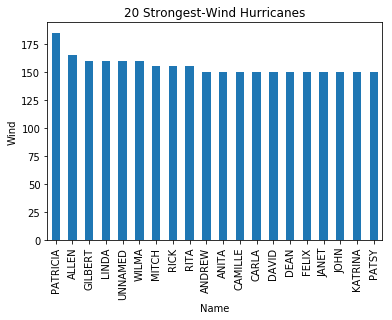

In [65]:
fig = df.groupby('Name').Wind.aggregate(['max']).nlargest(20, 'max').plot(kind='bar', legend=False)
fig.set_title('20 Strongest-Wind Hurricanes')
fig.set_ylabel('Wind');

### 8) Plot the count of all datapoints by Basin

as a bar chart

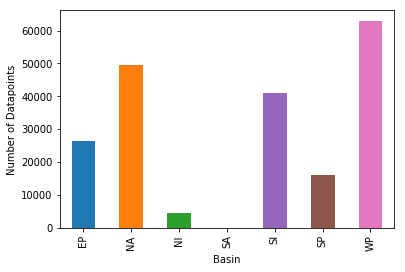

In [80]:
fig = df.groupby('Basin').Serial_Num.count().plot(kind='bar')
fig.set_ylabel('Number of Datapoints');

### 9) Plot the count of unique hurricanes by Basin

as a bar chart. (You will need to call `groupby` twice.)

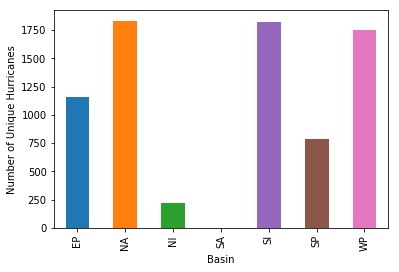

In [82]:
fig = df.groupby('Basin').Serial_Num.nunique().plot(kind='bar')
fig.set_ylabel('Number of Unique Hurricanes');

### 10) Make a `hexbin` of the location of datapoints in Latitude and Longitude

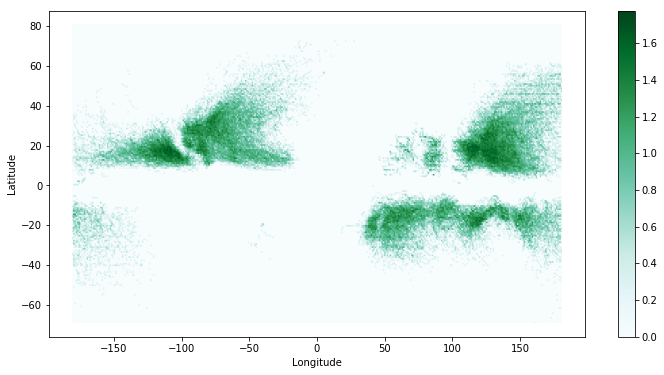

In [88]:
fig = df.plot.hexbin('Longitude','Latitude', 
                    gridsize=(360,180), figsize=(12,6), bins='log',
                    sharex = False) #without this, doesn't show x label

### 11) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

Use wind speed to color the points.

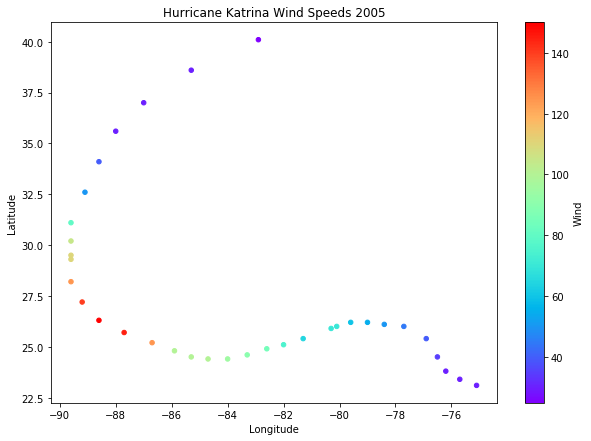

In [87]:
kat = df.loc[df.Name == 'KATRINA']
kat2005 = kat.loc[kat.Season == 2005]
kat2005.head()

fig = kat2005.plot.scatter(x='Longitude',y='Latitude', figsize=(10,7),
                           c='Wind', colormap='rainbow',sharex = False )
fig.set_title('Hurricane Katrina Wind Speeds 2005');



### 12) Make time the index on your dataframe

In [90]:
dft = df.set_index('ISO_time')
dft.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,Nature,Latitude,Longitude,Wind,Pres
ISO_time,,,,,,,,,,,
1848-01-11 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-8.6,79.8,0.0,0.0
1848-01-12 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-9.0,78.9,0.0,0.0
1848-01-13 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-10.4,73.2,0.0,0.0
1848-01-14 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-12.8,69.9,0.0,0.0
1848-01-15 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-13.9,68.9,0.0,0.0


### 13) Plot the count of all datapoints per year as a timeseries

You should use `resample`

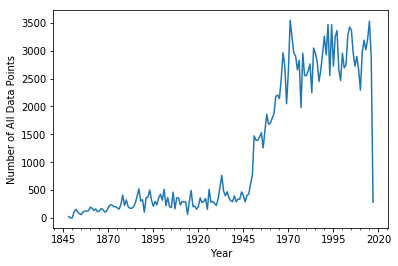

In [95]:
fig = dft.resample('Y').Serial_Num.count().plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of All Data Points');


# alternatively: (w/out resample)
# fig = dft.groupby(dft.index.year).Serial_Num.count().plot()

### 14) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

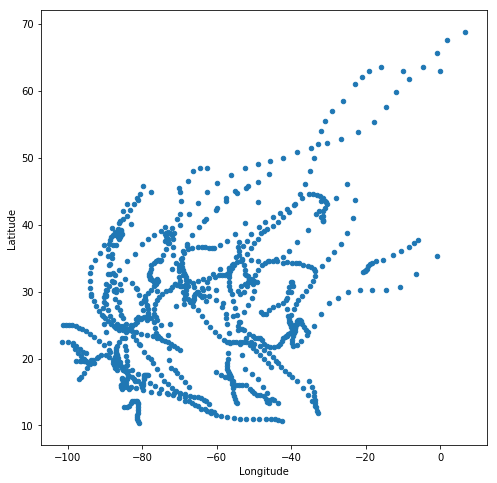

In [97]:
# df.groupby('Basin').nunique()

NA = df.loc[df.Basin == 'NA']
NA2005 = NA.loc[NA.Season == 2005]
names = list(NA2005.Name.unique())
fig, ax = plt.subplots(figsize=(8,8))

for i in range(len(names)):
    try:
        NA2005.loc[NA2005['Name']==names[i]].plot(x='Longitude', y='Latitude',kind='scatter', ax=ax)
    except:
        pass    


### 15) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [106]:
NA = df.loc[df.Basin == 'NA']
NA1970 = NA.loc[NA.Season >= 1970]

### 16) Plot the number of datapoints per day

Make sure you figure is big enough to actually see the plot

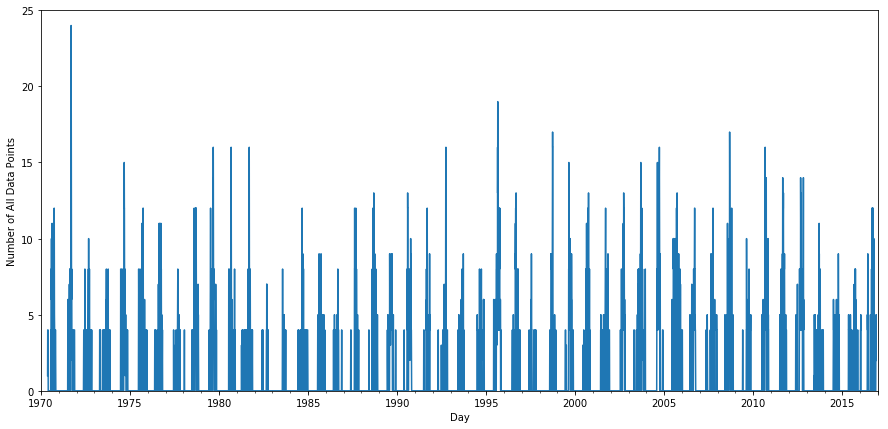

In [108]:
counts_per_day = NA1970t.resample('D').Serial_Num.count()

fig = counts_per_day.plot(kind='line',legend=None,figsize=(15,7))

fig.set_xlabel('Day')
fig.set_ylabel('Number of All Data Points')
fig.autoscale()
fig.set_ylim(0,25)
fig.set_xlim('1970-01-01 10:00:00','2017-01-01 00:00:00');

### 17) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

Text(0.5,0,'Day of Year')

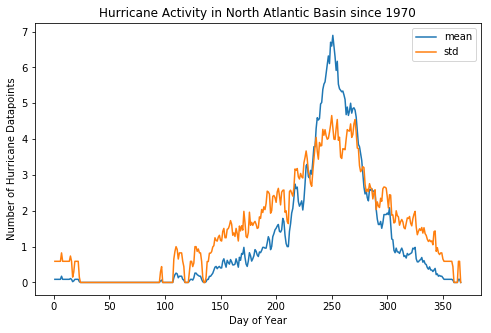

In [109]:
fig, ax = plt.subplots(figsize=(8,5))

doy = counts_per_day.groupby(counts_per_day.index.dayofyear)

doy.aggregate(['mean','std']).plot(ax=ax)

ax.set_title('Hurricane Activity in North Atlantic Basin since 1970')
ax.set_ylabel('Number of Hurricane Datapoints')
ax.set_xlabel('Day of Year')



### 18) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot

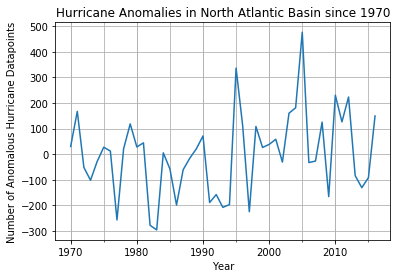

In [110]:
#look at anomalies by removing mean
def remove_mean(x):
    return x - x.mean()

counts_per_year = NA1970t.resample('A').Serial_Num.count()

ax = counts_per_year.transform(remove_mean).plot()


ax.set_title('Hurricane Anomalies in North Atlantic Basin since 1970')
ax.set_ylabel('Number of Anomalous Hurricane Datapoints')
ax.set_xlabel('Year')
ax.autoscale
ax.grid(which='both')

Which years stand out as having anomalous hurricane activity?
* 1995, 2005